# Lab 1 : Week 2

In [1]:
import numpy as np
import pandas as pd

import ugradio
import ugradio.pico as pico
import ugradio.dft as dft

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

## import data from data.npz file
### sample electronic signals and convert them into digital signals

In [2]:
imported_data = np.load("data.npz")

In [3]:
imported_data.files

['arr_0']

In [4]:
imported_data['arr_0']

array([[[ -9216,  11008, -12544, ...,  -6912,   4864,  -2560],
        [-17152,  17408, -17152, ...,   7680,  -9472,  11264],
        [-14848,  13824, -12288, ...,  15616, -16384,  16896]],

       [[ 16640,   3584, -10496, ...,  -5632,   8960,  19712],
        [-20480, -15104,  -2304, ...,  15872,   2304, -11520],
        [ 19968,   9728,  -4864, ..., -11264,   2816,  15872]]],
      dtype=int16)

## extract and inspect data

In [5]:
imported_data['arr_0'].shape

(2, 3, 16000)

In [6]:
sig_a_data = imported_data["arr_0"][0,0, :200]
sig_a_data[:10]

array([ -9216,  11008, -12544,  14080, -15104,  16128, -16640,  17152,
       -17152,  17152], dtype=int16)

In [7]:
sig_b_data = imported_data["arr_0"][1,0,:200]
sig_b_data[:10]

array([ 16640,   3584, -10496, -19200, -19200, -10240,   4096,  16896,
        21248,  14848], dtype=int16)

## create time array from sampling frequency = 62.5 MHz/N 

In [25]:
data_length = len(sig_a_data)
N = 1
sampling_frequency_MHz = 62500/N
delta_t = 1/sampling_frequency_MHz
total_time = delta_t * data_length  

In [29]:
times = np.arange(0, total_time, delta_t)

In [30]:
times

array([0.000e+00, 1.600e-05, 3.200e-05, 4.800e-05, 6.400e-05, 8.000e-05,
       9.600e-05, 1.120e-04, 1.280e-04, 1.440e-04, 1.600e-04, 1.760e-04,
       1.920e-04, 2.080e-04, 2.240e-04, 2.400e-04, 2.560e-04, 2.720e-04,
       2.880e-04, 3.040e-04, 3.200e-04, 3.360e-04, 3.520e-04, 3.680e-04,
       3.840e-04, 4.000e-04, 4.160e-04, 4.320e-04, 4.480e-04, 4.640e-04,
       4.800e-04, 4.960e-04, 5.120e-04, 5.280e-04, 5.440e-04, 5.600e-04,
       5.760e-04, 5.920e-04, 6.080e-04, 6.240e-04, 6.400e-04, 6.560e-04,
       6.720e-04, 6.880e-04, 7.040e-04, 7.200e-04, 7.360e-04, 7.520e-04,
       7.680e-04, 7.840e-04, 8.000e-04, 8.160e-04, 8.320e-04, 8.480e-04,
       8.640e-04, 8.800e-04, 8.960e-04, 9.120e-04, 9.280e-04, 9.440e-04,
       9.600e-04, 9.760e-04, 9.920e-04, 1.008e-03, 1.024e-03, 1.040e-03,
       1.056e-03, 1.072e-03, 1.088e-03, 1.104e-03, 1.120e-03, 1.136e-03,
       1.152e-03, 1.168e-03, 1.184e-03, 1.200e-03, 1.216e-03, 1.232e-03,
       1.248e-03, 1.264e-03, 1.280e-03, 1.296e-03, 

## plot data over samples and over time

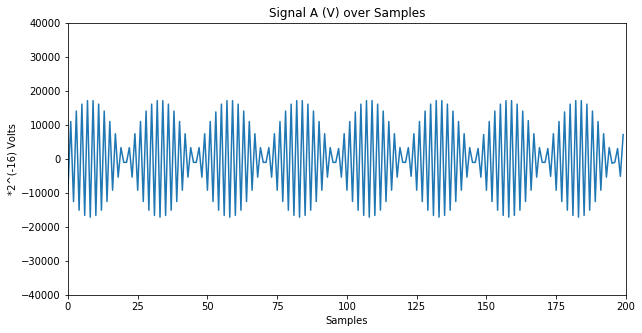

In [41]:
# signal A over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples")
plt.ylabel("*2^(-16) Volts")
plt.title("Signal A (V) over Samples")
plt.plot(sig_a_data)

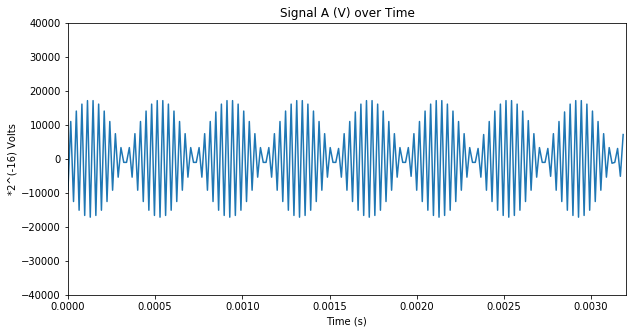

In [42]:
# signal A over time
plt.figure(figsize=(10,5))
plt.xlim(0, total_time)
plt.ylim(-40000,40000)
plt.xlabel("Time (s)")
plt.ylabel("*2^(-16) Volts")
plt.title("Signal A (V) over Time")
plt.plot(times, sig_a_data)

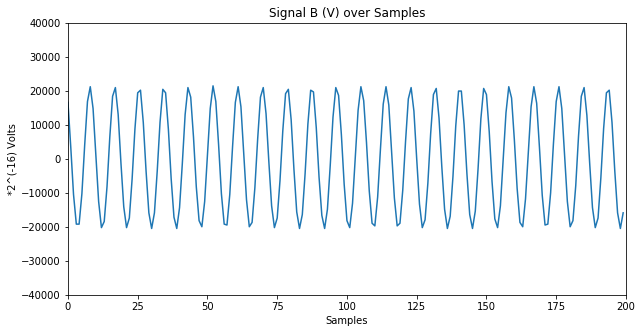

In [43]:
# signal B over samples
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples")
plt.ylabel("*2^(-16) Volts")
plt.title("Signal B (V) over Samples")
plt.plot(sig_b_data)

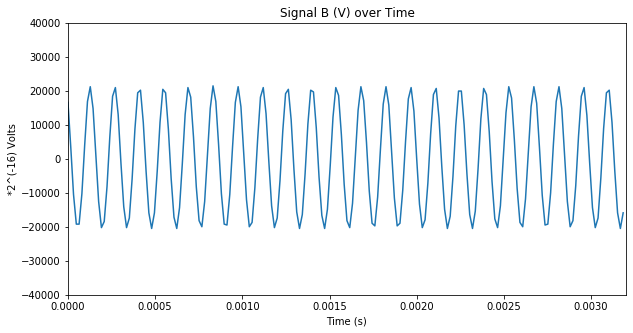

In [44]:
# signal B over time
plt.figure(figsize=(10,5))
plt.xlim(0, total_time)
plt.ylim(-40000,40000)
plt.xlabel("Time (s)")
plt.ylabel("*2^(-16) Volts")
plt.title("Signal B (V) over Time")
plt.plot(times, sig_b_data)

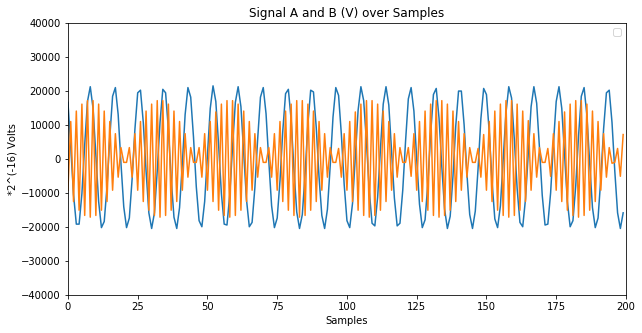

In [45]:
plt.figure(figsize=(10,5))
plt.xlim(0, 200)
plt.ylim(-40000,40000)
plt.xlabel("Samples")
plt.ylabel("*2^(-16) Volts")
plt.title("Signal A and B (V) over Samples")
plt.legend(["Signal A", "Signal B"])
plt.plot(sig_b_data)
plt.plot(sig_a_data)

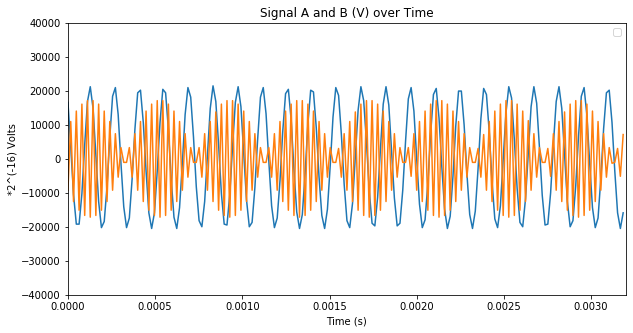

In [47]:
plt.figure(figsize=(10,5))
plt.xlim(0, total_time)
plt.ylim(-40000,40000)
plt.xlabel("Time (s)")
plt.ylabel("*2^(-16) Volts")
plt.title("Signal A and B (V) over Time")
plt.legend(["Signal A", "Signal B"])
plt.plot(times, sig_b_data)
plt.plot(times, sig_a_data)

### does the period match what you expected?

## take the fourier transform of data

In [62]:
dft.dft(sig_a_data, vsamp=1)

(array([-0.5  , -0.495, -0.49 , -0.485, -0.48 , -0.475, -0.47 , -0.465,
        -0.46 , -0.455, -0.45 , -0.445, -0.44 , -0.435, -0.43 , -0.425,
        -0.42 , -0.415, -0.41 , -0.405, -0.4  , -0.395, -0.39 , -0.385,
        -0.38 , -0.375, -0.37 , -0.365, -0.36 , -0.355, -0.35 , -0.345,
        -0.34 , -0.335, -0.33 , -0.325, -0.32 , -0.315, -0.31 , -0.305,
        -0.3  , -0.295, -0.29 , -0.285, -0.28 , -0.275, -0.27 , -0.265,
        -0.26 , -0.255, -0.25 , -0.245, -0.24 , -0.235, -0.23 , -0.225,
        -0.22 , -0.215, -0.21 , -0.205, -0.2  , -0.195, -0.19 , -0.185,
        -0.18 , -0.175, -0.17 , -0.165, -0.16 , -0.155, -0.15 , -0.145,
        -0.14 , -0.135, -0.13 , -0.125, -0.12 , -0.115, -0.11 , -0.105,
        -0.1  , -0.095, -0.09 , -0.085, -0.08 , -0.075, -0.07 , -0.065,
        -0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035, -0.03 , -0.025,
        -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,
         0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,  0.05 , 

In [73]:
# dft.dft
ft_time = dft.dft(sig_a_data, vsamp=1)[0]
dft_sig_a = dft.dft(sig_a_data, vsamp=1)[1]
dft_sig_b = dft.dft(sig_b_data, vsamp=1)[1]

In [74]:
# numpy.fft.fft
fft_sig_a = np.fft.fft(sig_a_data)
fft_sig_b = np.fft.fft(sig_b_data)

In [75]:
dft_sig_a[:10]

array([ 1.02400000e+03-4.31471080e-09j, -7.92639715e-01-6.05725715e+02j,
        8.99390392e+02-5.50876148e+02j,  1.32387801e+03-6.58401426e+02j,
       -9.22202053e+05+1.45895029e+06j,  2.06433371e+02+1.51716209e+03j,
        3.61173286e+02+7.91707443e+02j,  2.84802919e+02+6.60812194e+02j,
        1.11764468e+03+2.72241784e+02j,  5.99231492e+01+4.70426953e+02j])

In [76]:
fft_sig_a[:10]

array([ 8704.           +0.j        ,  -209.08153838  -82.98940202j,
        -391.42766541 -390.81538111j,  -125.62003473  +59.01375822j,
       -1756.2050586  -616.01860494j,   925.66520308 -713.78774698j,
         114.87227504 +261.36412383j,  -393.66481067 +129.32014606j,
       -1976.41737358-1217.72250425j,  -106.46819026 -674.92457274j])

In [77]:
dft_sig_b[:10]

array([16128.        -3.81526689e-09j, 16862.17303692-3.02601531e+02j,
       14597.11232762-3.14640284e+02j, 16038.12662704+7.41763603e+02j,
       16673.41738718-8.34028425e+01j, 17548.89213176-1.86493257e+01j,
       17254.89475494+2.92054492e+03j, 17192.49830533+5.05975546e+02j,
       18108.97562424+6.17365358e+02j, 15176.01167358+2.59216270e+03j])

In [78]:
fft_sig_b[:10]

array([-43264.            +0.j        , -34184.09927402 +1475.35089115j,
       -36613.21908995 +4256.58850398j, -35774.97894224 +5520.33371621j,
       -36196.7933572  +4323.6997236j , -38728.8309857  +7340.64247627j,
       -39112.38684    +8371.15851752j, -41004.16893192+10014.31937463j,
       -41196.35240182+11220.51999017j, -43691.88594419+12838.52553737j])

## display Discete Fourier Transforms (DFTs) and corresponding fourier power spectra

Text(0.5, 1.0, 'Signal A Discrete Fourier Transform')

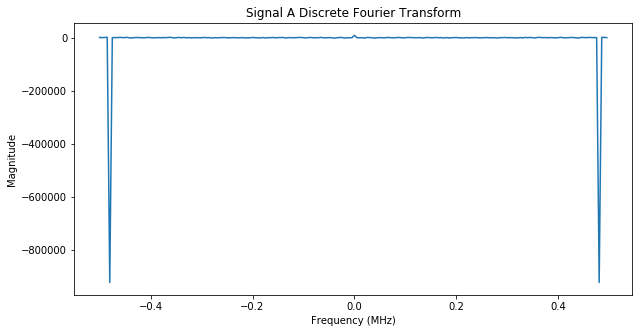

In [79]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, dft_sig_a)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A Discrete Fourier Transform")

Text(0.5, 1.0, 'Signal A Discrete Fourier Power Spectrum')

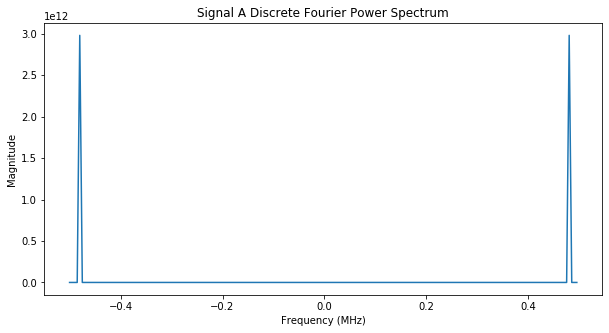

In [103]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, abs((dft_sig_a))**2)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A Discrete Fourier Power Spectrum")

Text(0.5, 1.0, 'Signal B Discrete Fourier Transform')

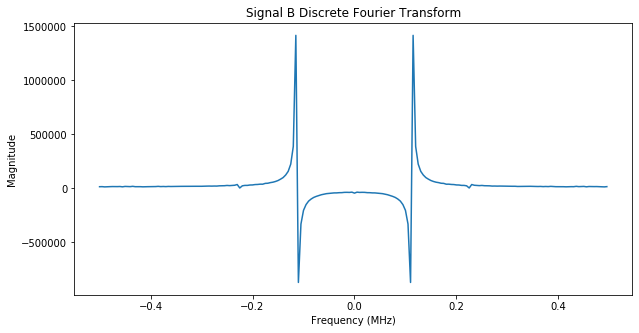

In [104]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, dft_sig_b)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal B Discrete Fourier Transform")

Text(0.5, 1.0, 'Signal B Discrete Fourier Power Spectrum')

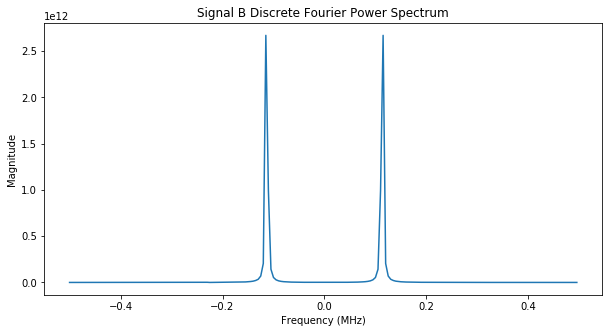

In [105]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, abs((dft_sig_b))**2)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal B Discrete Fourier Power Spectrum")

## Display Fast Fourier Transforms and corresponding fourier power spectra

Text(0.5, 1.0, 'Signal A Fast Fourier Transform')

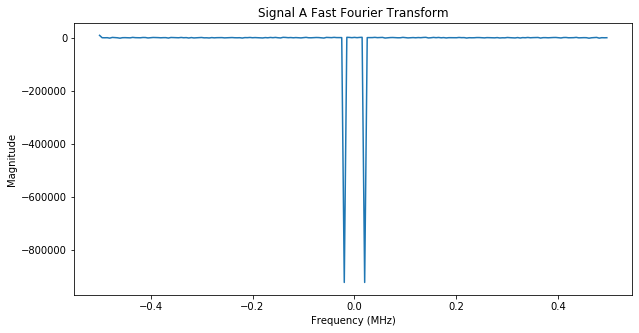

In [81]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, fft_sig_a)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A Fast Fourier Transform")

Text(0.5, 1.0, 'Signal A Fast Fourier Power Spectrum')

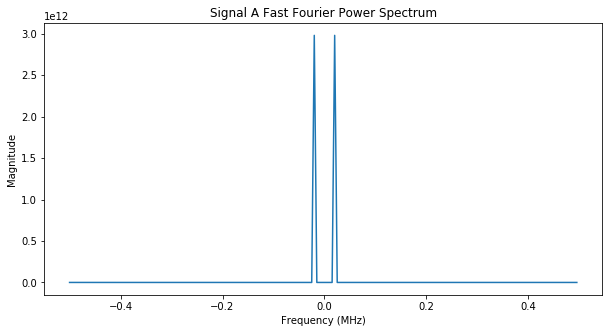

In [106]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, abs((fft_sig_a))**2)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A Fast Fourier Power Spectrum")

Text(0.5, 1.0, 'Signal B Fast Fourier Transform')

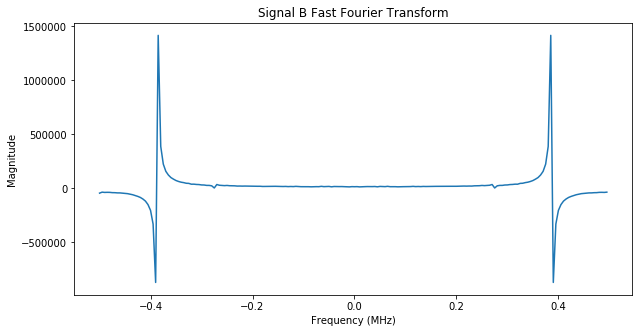

In [82]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, fft_sig_b)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal B Fast Fourier Transform")

Text(0.5, 1.0, 'Signal B Fast Fourier Power Spectrum')

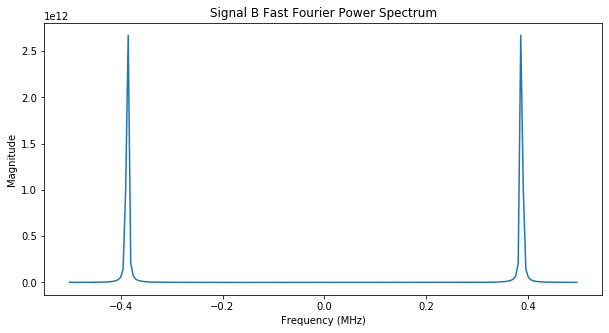

In [108]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, abs((fft_sig_b))**2)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal B Fast Fourier Power Spectrum")

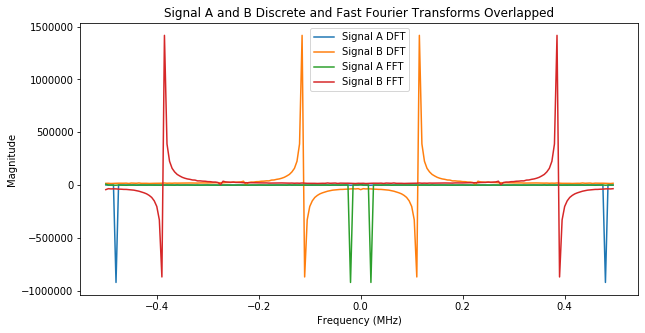

In [85]:
plt.figure(figsize=(10,5))
plt.plot(ft_time, dft_sig_a)
plt.plot(ft_time, dft_sig_b)
plt.plot(ft_time, fft_sig_a)
plt.plot(ft_time, fft_sig_b)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A and B Discrete and Fast Fourier Transforms Overlapped")
plt.legend(["Signal A DFT", "Signal B DFT", "Signal A FFT", "Signal B FFT"])
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

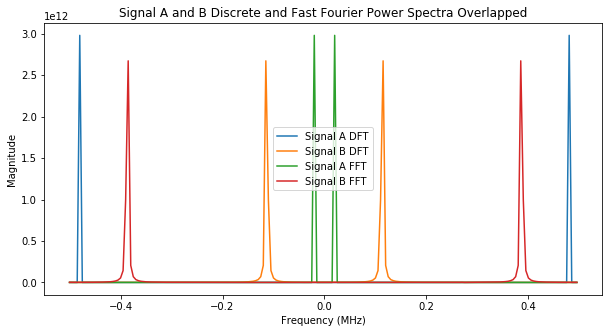

In [109]:
plt.figure(figsize=(10,5))
plt.plot(ft_time, abs(dft_sig_a)**2)
plt.plot(ft_time, abs(dft_sig_b)**2)
plt.plot(ft_time, abs(fft_sig_a)**2)
plt.plot(ft_time, abs(fft_sig_b)**2)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("Signal A and B Discrete and Fast Fourier Power Spectra Overlapped")
plt.legend(["Signal A DFT", "Signal B DFT", "Signal A FFT", "Signal B FFT"])
#plt.xlim(0, 200)
#plt.ylim(-25000,25000)

## find frequencies from fourier plots

Text(0.5, 1.0, 'Signal A Fourier Transform')

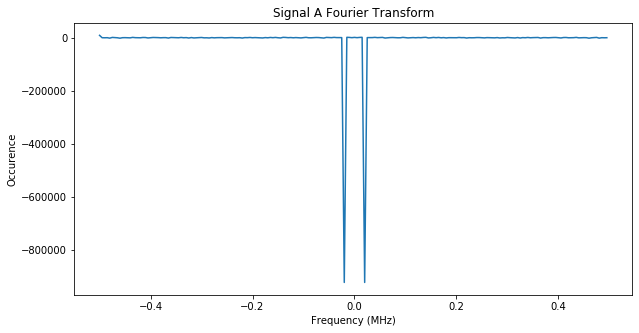

In [87]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, fft_sig_a)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Occurence")
plt.title("Signal A Fourier Transform")

In [95]:
fftfreq_sig_a = np.fft.fftfreq(data_length, delta_t)

In [96]:
fftfreq_sig_a

array([     0. ,    312.5,    625. ,    937.5,   1250. ,   1562.5,
         1875. ,   2187.5,   2500. ,   2812.5,   3125. ,   3437.5,
         3750. ,   4062.5,   4375. ,   4687.5,   5000. ,   5312.5,
         5625. ,   5937.5,   6250. ,   6562.5,   6875. ,   7187.5,
         7500. ,   7812.5,   8125. ,   8437.5,   8750. ,   9062.5,
         9375. ,   9687.5,  10000. ,  10312.5,  10625. ,  10937.5,
        11250. ,  11562.5,  11875. ,  12187.5,  12500. ,  12812.5,
        13125. ,  13437.5,  13750. ,  14062.5,  14375. ,  14687.5,
        15000. ,  15312.5,  15625. ,  15937.5,  16250. ,  16562.5,
        16875. ,  17187.5,  17500. ,  17812.5,  18125. ,  18437.5,
        18750. ,  19062.5,  19375. ,  19687.5,  20000. ,  20312.5,
        20625. ,  20937.5,  21250. ,  21562.5,  21875. ,  22187.5,
        22500. ,  22812.5,  23125. ,  23437.5,  23750. ,  24062.5,
        24375. ,  24687.5,  25000. ,  25312.5,  25625. ,  25937.5,
        26250. ,  26562.5,  26875. ,  27187.5,  27500. ,  2781

In [99]:
max(abs(fftfreq_sig_a))

31250.0

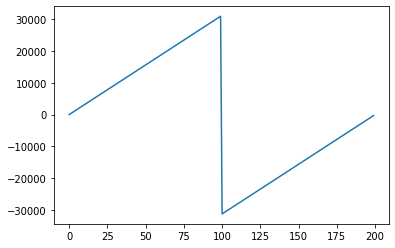

In [100]:
plt.plot(fftfreq_sig_a)

## determine Nyquist's Criterion
### minimum sampling rate that accurately reproduces the spectral frequency in the sampled data. 

## Plot real and imaginary parts of the voltage spectrum

In [121]:
# get independent data captures of the same signals
sig_a_data_2 = imported_data["arr_0"][0,0, 300:500]
sig_b_data_2 = imported_data["arr_0"][1,0, 300:500]
dft_sig_a_2 = dft.dft(sig_a_data_2, vsamp=1)[1]
dft_sig_b_2 = dft.dft(sig_b_data_2, vsamp=1)[1]

Text(0.5, 1.0, 'Signal A Real and Imaginary Discrete Fourier Transform')

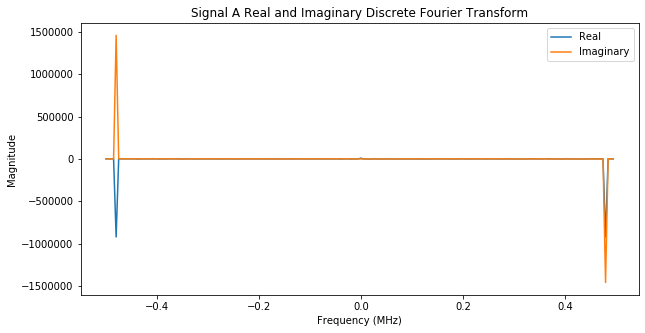

In [122]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, dft_sig_a.real)
plt.plot(ft_time, dft_sig_a.imag)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["Real", "Imaginary"])
plt.title("Signal A Real and Imaginary Discrete Fourier Transform")

Text(0.5, 1.0, 'Signal A_2 Real and Imaginary Discrete Fourier Transform')

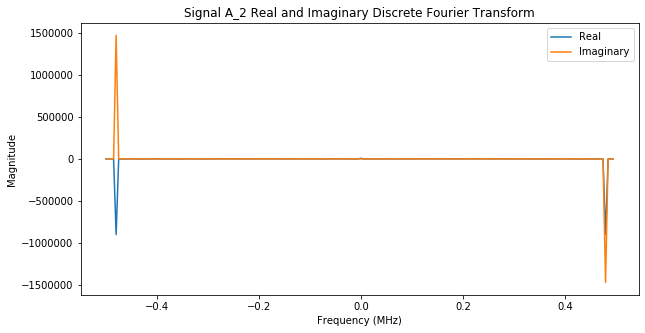

In [123]:
plt.figure(figsize=(10,5))
#plt.xlim(0, 200)
#plt.ylim(-1000000,100000)
plt.plot(ft_time, dft_sig_a_2.real)
plt.plot(ft_time, dft_sig_a_2.imag)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["Real", "Imaginary"])
plt.title("Signal A_2 Real and Imaginary Discrete Fourier Transform")

Text(0.5, 1.0, 'Signal B Real and Imaginary Discrete Fourier Transform')

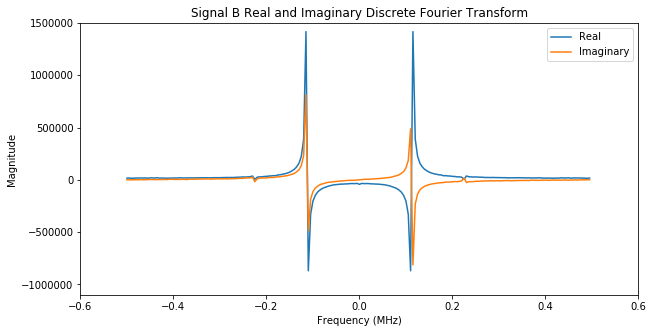

In [136]:
plt.figure(figsize=(10,5))
plt.xlim(-.6, .6)
plt.ylim(-1100000, 1500000)
plt.plot(ft_time, dft_sig_b.real)
plt.plot(ft_time, dft_sig_b.imag)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["Real", "Imaginary"])
plt.title("Signal B Real and Imaginary Discrete Fourier Transform")

Text(0.5, 1.0, 'Signal B_2 Real and Imaginary Discrete Fourier Transform')

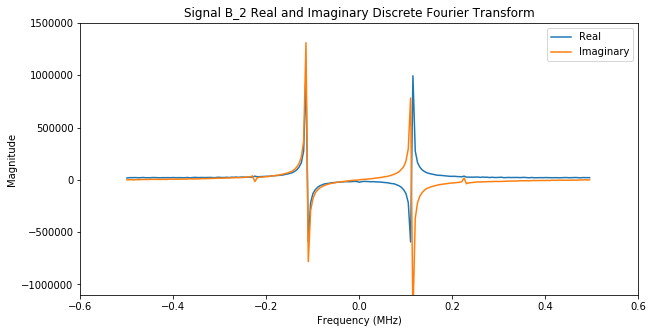

In [137]:
plt.figure(figsize=(10,5))
plt.xlim(-.6, .6)
plt.ylim(-1100000, 1500000)
plt.plot(ft_time, dft_sig_b_2.real)
plt.plot(ft_time, dft_sig_b_2.imag)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.legend(["Real", "Imaginary"])
plt.title("Signal B_2 Real and Imaginary Discrete Fourier Transform")